     Outlook  Temperature Temperature_Category  Humidity Humidity_Category  \
0   overcast           83                  hot        86              high   
1   overcast           64                 cool        65            normal   
2   overcast           72                 mild        90              high   
3   overcast           81                  hot        75            normal   
4      rainy           70                 mild        96              high   
5      rainy           68                 cool        80            normal   
6      rainy           65                 cool        70            normal   
7      rainy           75                 mild        80            normal   
8      rainy           71                 mild        91              high   
9      sunny           85                  hot        85              high   
10     sunny           80                  hot        90              high   
11     sunny           72                 mild        95        

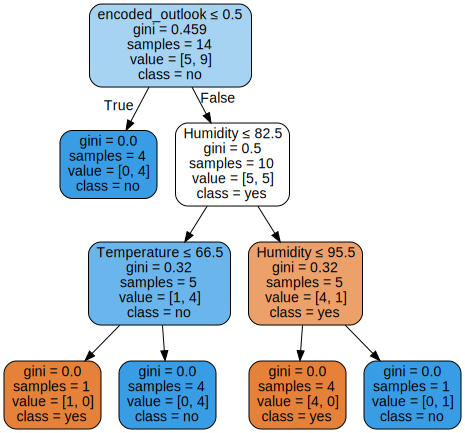

In [1]:
# In this Notebook, we take a closer look at the calcualtions
# for the Gini Coeffcient and Entropy that are used in the 
# algorithms that are used to learn a good decision tree from data

# First, we start with a littel example for Gini
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import sys
from sklearn import preprocessing
import graphviz 
import numpy as np
import math

golf_file = "golf.csv"
golf_file_handler = open(golf_file, "r")
golf_data = pd.read_csv(golf_file_handler, sep=";")
golf_file_handler.close()

print(golf_data[:100])

# transform female into 0 and male into 1 using an extra column
outlook_encoder = preprocessing.LabelEncoder()
outlook_encoder.fit(['overcast','rainy','sunny'])
golf_data['encoded_outlook']=outlook_encoder.transform(golf_data['Outlook'])

dtree = tree.DecisionTreeClassifier(
    criterion='gini', # {“gini”, “entropy”}
    splitter='best', # {“best”, “random”} 
    max_depth=None, # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2, # The minimum number of samples required to split an internal node 
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node. 
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_features=None, # The number of features to consider when looking for the best split
    max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion. 
    min_impurity_decrease=0.0 # A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 
    )

dtree = dtree.fit(golf_data[['encoded_outlook','Temperature','Humidity','Windy']], golf_data[['Play']])
dot_data = tree.export_graphviz(dtree, 
                                out_file=None,
                                feature_names=['encoded_outlook','Temperature','Humidity','Windy'],  
                                class_names=['yes','no'],  
                                filled=True, rounded=True,  
                                special_characters=True)   
display(graphviz.Source(dot_data))


In [2]:
# function for Gini
def gini_leave(fp,fn):
    return 1-(fp/(fp+fn))**2-(fn/(fp+fn))**2

def gini_impurity(tp,fp,fn,tn):
    return ((tp+fp)/(tp+fp+fn+tn))*gini_leave(tp,fp)+((fn+tn)/(tp+fp+fn+tn))*gini_leave(fn,tn)

print('The labels on the tree show the leave impurities')
print(gini_leave(5,9))
print(gini_leave(0,4))
print(gini_leave(5,5))
print(gini_leave(1,4))
print(gini_leave(4,1))
print(gini_leave(1,0))
print(gini_leave(0,4))
print(gini_leave(4,0))
print(gini_leave(0,1))

print(gini_impurity(0,4,5,5))

The labels on the tree show the leave impurities
0.4591836734693877
0.0
0.5
0.31999999999999984
0.31999999999999984
0.0
0.0
0.0
0.0
0.35714285714285715


C:\Users\hoka416\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


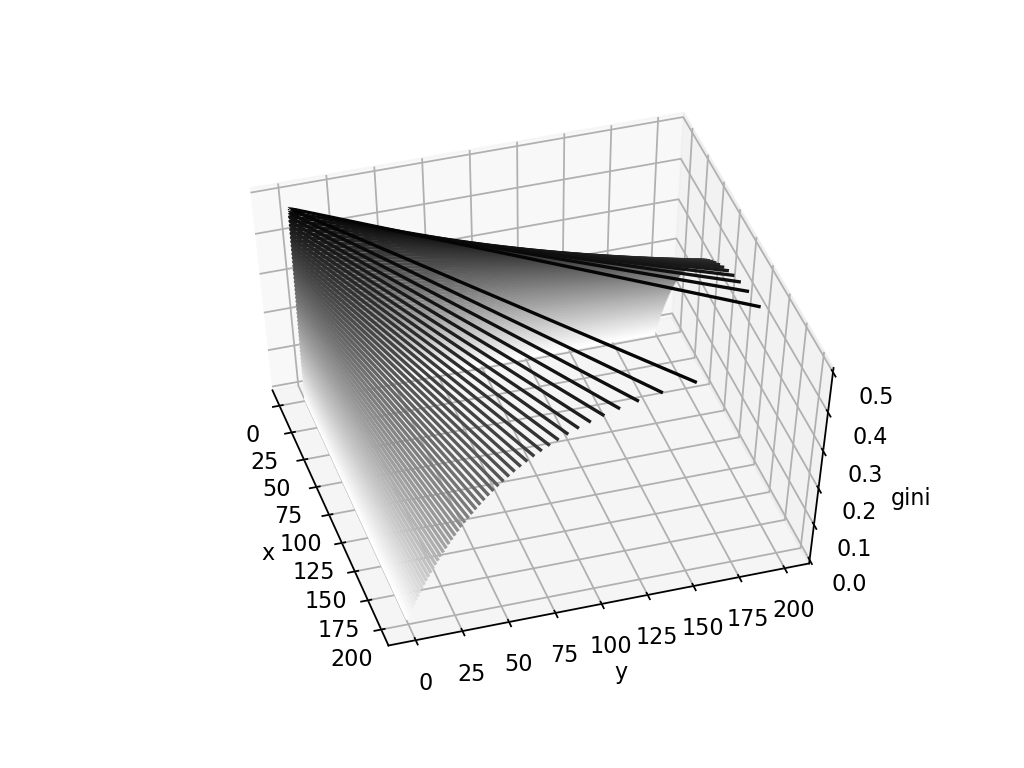

Text(0.5, 0, 'gini')

In [3]:
# So, how does the gini impurity of the leave nodes look like...
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

r = np.arange(0, 200)
X, Y = np.meshgrid(r,r)
Z = gini_leave(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('gini')

<IPython.core.display.Javascript object>


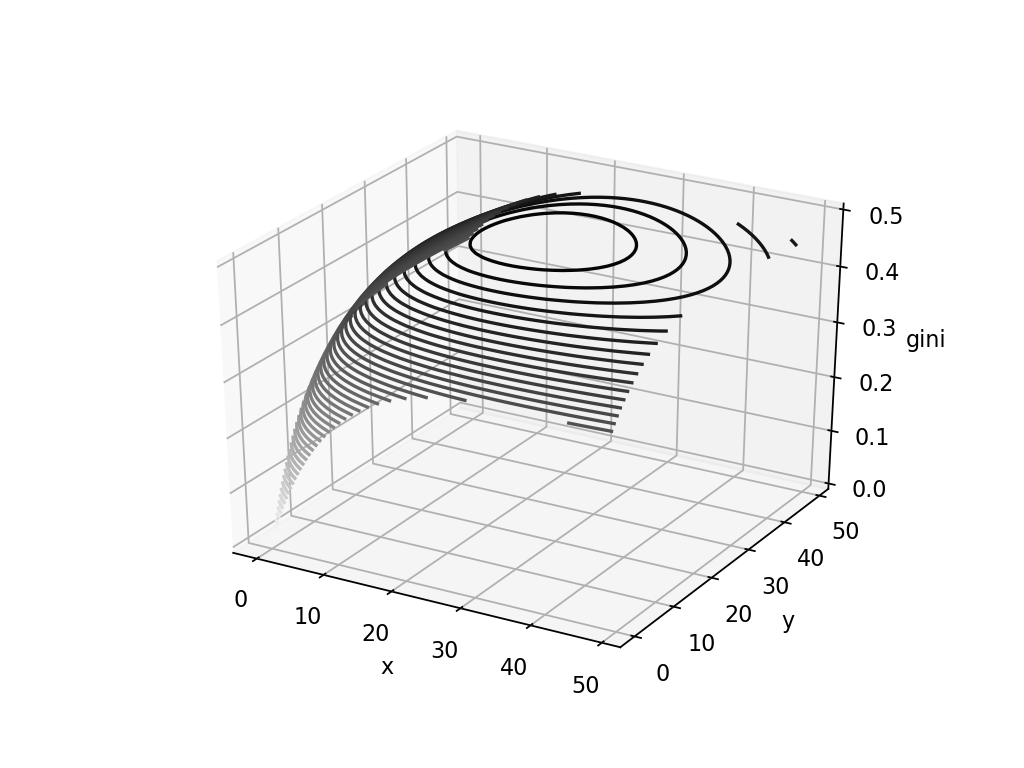

Text(0.5, 0, 'gini')

In [4]:
# and how des the gini impurity of the root node look like?
r= np.arange(0, 50)

X,Y = np.meshgrid(r,r)

g1=25
g2=25

Z = gini_impurity(X, 25, 25, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('gini')

#.. so there is qubic growth form all sides of the two residual paramters.

<IPython.core.display.Javascript object>


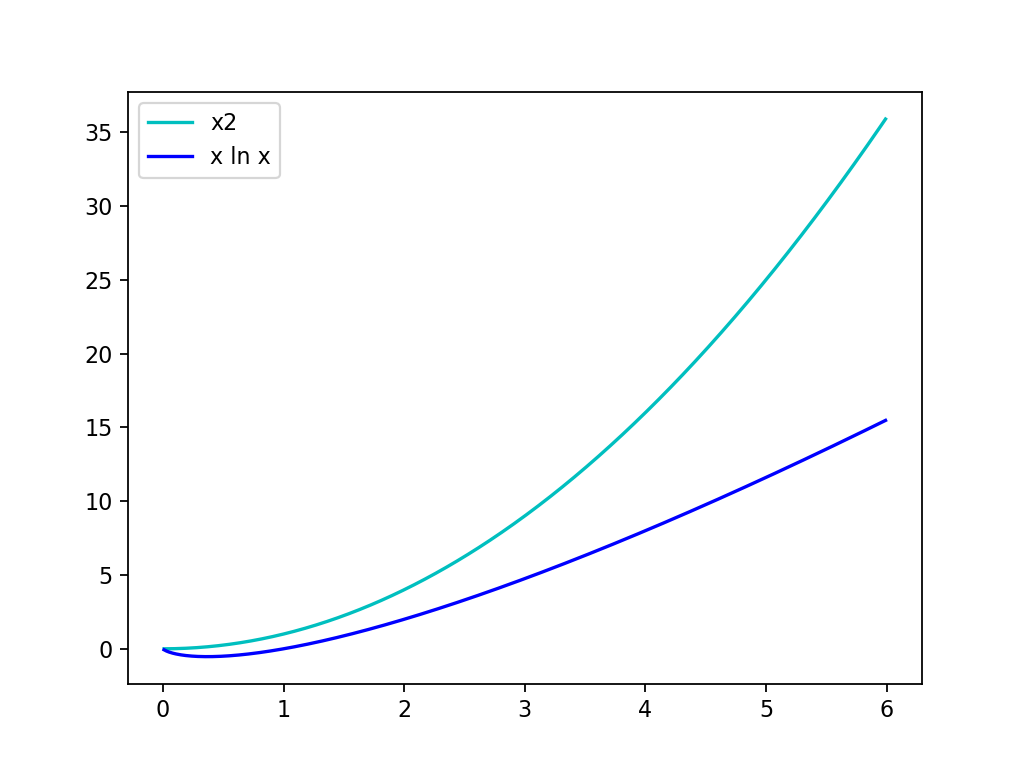

<function matplotlib.pyplot.show(*args, **kw)>

In [14]:
def ln_ (x):
    return x*math.log(x,2)
lnv = np.vectorize(ln_)

r= np.arange(0.01, 6, 0.01)
y1=r**2
y2=lnv(r)
fig = plt.figure()

plt.plot(r,y1,'c',label="x2")
plt.plot(r,y2,'b',label="x ln x")
plt.legend(loc='upper left')

plt.show

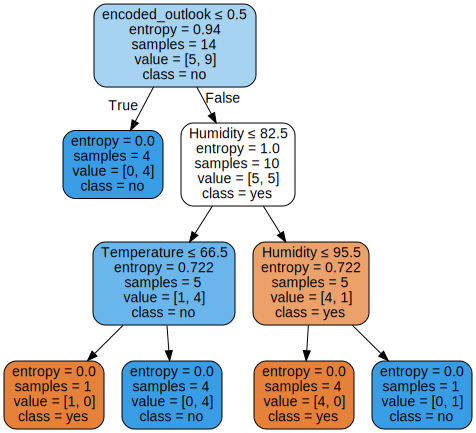

In [6]:
dtree = tree.DecisionTreeClassifier(
    criterion='entropy', # {“gini”, “entropy”}
    splitter='best', # {“best”, “random”} 
    max_depth=None, # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2, # The minimum number of samples required to split an internal node 
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node. 
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_features=None, # The number of features to consider when looking for the best split
    max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion. 
    min_impurity_decrease=0.0 # A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 
    )

dtree = dtree.fit(golf_data[['encoded_outlook','Temperature','Humidity','Windy']], golf_data[['Play']])
dot_data = tree.export_graphviz(dtree, 
                                out_file=None,
                                feature_names=['encoded_outlook','Temperature','Humidity','Windy'],  
                                class_names=['yes','no'],  
                                filled=True, rounded=True,  
                                special_characters=True)   
display(graphviz.Source(dot_data))

In [7]:
# And with Entropy?
def entropy(tp,fp):
    if(tp==0 or fp==0):
        return 0
    return -((tp/(tp+fp))*math.log((tp/(tp+fp)),2)+(fp/(tp+fp))*math.log((fp/(tp+fp)),2))

def information_gain(tp,fp,fn,tn):
    return entropy(tp+tn,fp+fn)-((entropy(tp,fp)*(tp+fp))/(tp+fp+fn+tn)+(entropy(tp,fp)*(tp+fp))/(tp+fp+fn+tn))

print('The labels on the tree show the entropy, not the information gain')
print(str(entropy(5,9))+' information gain '+str(information_gain(0,4,5,5)))
print(str(entropy(0,4)))
print(str(entropy(5,5))+' information gain '+str(information_gain(1,4,4,1)))
print(str(entropy(1,4))+' information gain '+str(information_gain(1,0,0,4)))
print(str(entropy(4,1))+' information gain '+str(information_gain(4,0,0,1)))
print(str(entropy(1,0)))
print(str(entropy(0,4)))
print(str(entropy(4,0)))
print(str(entropy(0,1)))



The labels on the tree show the entropy, not the information gain
0.9402859586706309 information gain 0.9402859586706309
0
1.0 information gain 0.0
0.7219280948873623 information gain 0.0
0.7219280948873623 information gain 0.0
0
0
0
0


[[1.         0.91829583 0.81127812 ... 0.04580001 0.04560648 0.04541469]
 [0.91829583 1.         0.97095059 ... 0.08112609 0.08079314 0.08046314]
 [0.81127812 0.97095059 1.         ... 0.11236071 0.11190991 0.11146303]
 ...
 [0.04580001 0.08112609 0.11236071 ... 1.         0.99999538 0.9999816 ]
 [0.04560648 0.08079314 0.11190991 ... 0.99999538 1.         0.99999542]
 [0.04541469 0.08046314 0.11146303 ... 0.9999816  0.99999542 1.        ]]


<IPython.core.display.Javascript object>


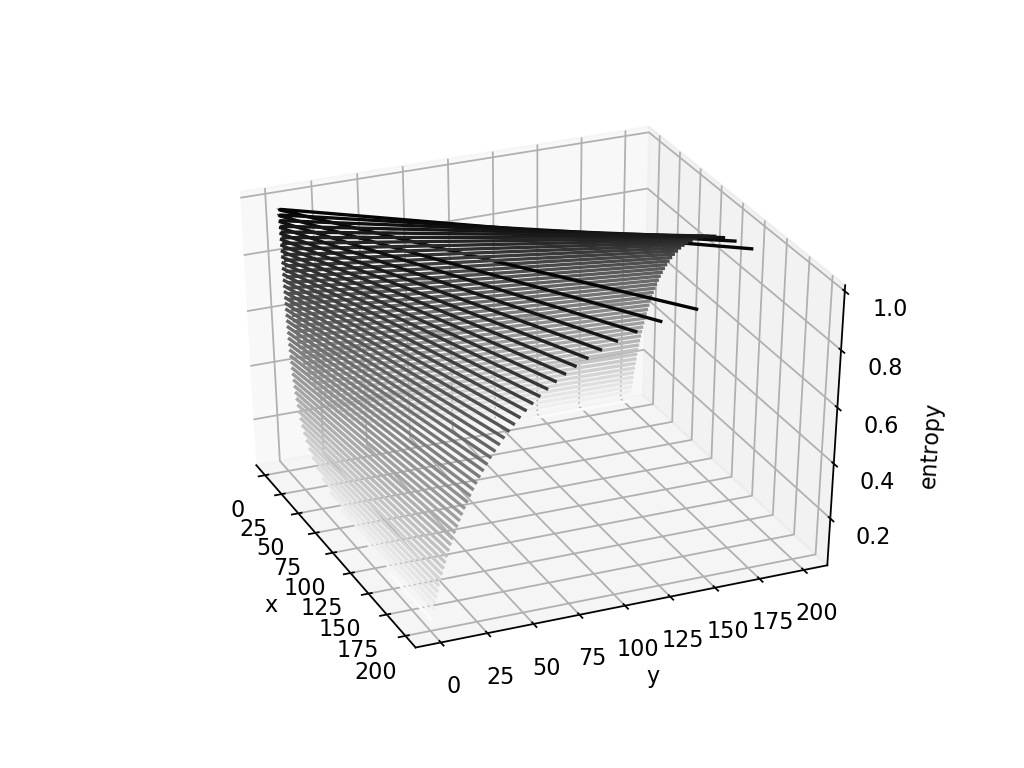

Text(0.5, 0, 'entropy')

In [8]:
# So, how does the entropy looks like...
def entropy(tp,fp):
    return -((tp/(tp+fp))*math.log((tp/(tp+fp)),2)+(fp/(tp+fp))*math.log((fp/(tp+fp)),2))
en = np.vectorize(entropy)

r = np.arange(1, 200)
X, Y = np.meshgrid(r,r)
Z = en(X, Y)

print(Z)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('entropy')

<IPython.core.display.Javascript object>


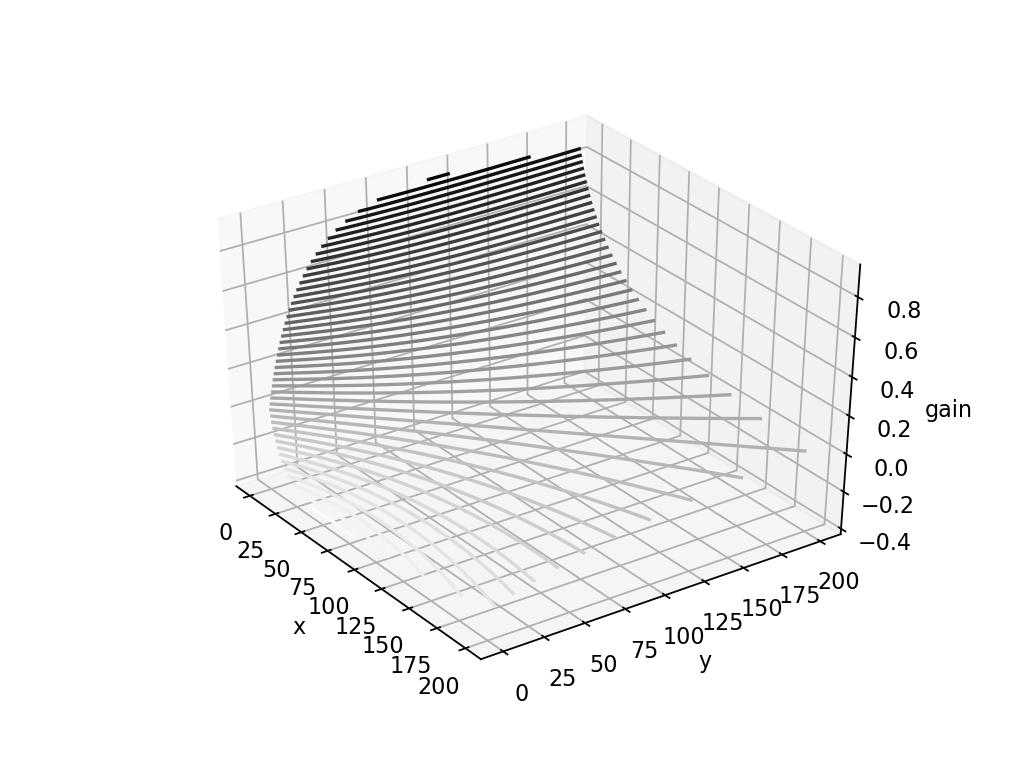

Text(0.5, 0, 'gain')

In [9]:
# and how des the information gain looks like?
r= np.arange(1, 200)
ig=np.vectorize(information_gain)
X,Y = np.meshgrid(r,r)

g1=250
g2=g1

Z = ig(X, 50,50, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('gain')

